# Redes Neurais: Problemas de Regressão

Autor:
- Arthur Vinicius Santos Silva
- Lucas da Silva Santos

## Lendo as bibliotecas

In [88]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
pd.set_option('display.max_columns', 25)

In [90]:
# Define a semente
seed_value = 2023
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

## Base de Dados


In [91]:
#from google.colab import drive
#drive.mount('/content/drive')

In [92]:
#df_treino_teste = pd.read_csv('/content/drive/MyDrive/os crias/8 Semestre/Data Science/AC2/base-dados/05_df_treino_teste.csv')
#df_treino_teste.tail()

df_treino_teste = pd.read_csv(
    './base-dados/05_df_treino_teste.csv')
df_treino_teste.tail()


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4995,P07626,KK Nagar,1733,17-09-2008,148,2.0,1.0,4,AbNormal,No,21-09-1993,Commercial,NoSeWa,Gravel,RL,2.9,4.5,4.9,4.180,709109,132958,14773100
4996,P04588,Karapakkam,1459,04-08-2010,35,2.0,2.0,4,Partial,Yes,06-08-2002,House,AllPub,Gravel,RH,2.0,3.0,4.4,3.260,333648,207403,9017500
4997,P00161,Anna Nagar,1854,02-11-2014,120,2.0,1.0,5,Normal Sale,Yes,07-11-1993,Others,ELO,No Access,RL,2.3,3.3,2.8,2.750,404223,236959,13938740
4998,P08529,Anna Nagar,1617,20-11-2007,58,1.0,1.0,4,AdjLand,Yes,21-11-2001,House,ELO,Gravel,RM,3.9,4.4,3.0,3.665,367007,211735,14115670
4999,P05833,Karapakkam,725,13-12-2009,147,1.0,1.0,2,AdjLand,Yes,21-12-1976,House,ELO,Paved,C,2.0,3.7,2.4,2.670,178317,49533,4953250


In [93]:
df_treino_teste.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [94]:
#df_treino_teste = df_treino_teste.drop(columns = ['PRT_ID'])

In [95]:
# df_validacao = pd.read_csv('/content/drive/MyDrive/os crias/8 Semestre/Data Science/AC2/base-dados/05_validacao.csv',sep=';')
# df_validacao.tail()

df_validacao = pd.read_csv(
    './base-dados/05_validacao.csv', sep=';')
df_validacao.tail()


,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
2104,P09034,Anna Nagar,1838,31,2.0,1.0,5,AdjLand,Yes,16/05/1971,Commercial,ELO,No Access,RH,2.7,3.7,3.2,3.15
2105,P02617,Chrompet,1191,189,1.0,1.0,3,Partial,Yes,07/09/1988,House,ELO,Gravel,RL,4.1,2.9,3.7,3.50
2106,P03449,KK Nagar,2317,37,4.0,2.0,6,AbNormal,No,31/03/1983,House,NoSewr,Paved,RH,5.0,4.6,2.2,3.76
2107,P06766,KK Nagar,2344,181,4.0,2.0,6,Normal Sale,No,04/06/1992,Commercial,NoSeWa,Gravel,RM,3.8,2.4,4.6,3.70
2108,P05763,Karapakkam,1008,194,1.0,1.0,3,Partial,Yes,03/01/1979,Commercial,NoSeWa,No Access,RL,2.5,4.5,3.4,3.46


## Tratamento de Dados

### Dividindo a base entre treino, teste e validação

### Verificar valores ausentes nos datasets

In [96]:
missing_values_treino_teste = df_treino_teste.isnull().sum()
missing_values_validacao = df_validacao.isnull().sum()

missing_values_treino_teste, missing_values_validacao

(PRT_ID            0
 AREA              0
 INT_SQFT          0
 DATE_SALE         0
 DIST_MAINROAD     0
 N_BEDROOM         0
 N_BATHROOM        4
 N_ROOM            0
 SALE_COND         0
 PARK_FACIL        0
 DATE_BUILD        0
 BUILDTYPE         0
 UTILITY_AVAIL     0
 STREET            0
 MZZONE            0
 QS_ROOMS          0
 QS_BATHROOM       0
 QS_BEDROOM        0
 QS_OVERALL       29
 REG_FEE           0
 COMMIS            0
 SALES_PRICE       0
 dtype: int64,
 PRT_ID            0
 AREA              0
 INT_SQFT          0
 DIST_MAINROAD     0
 N_BEDROOM         1
 N_BATHROOM        1
 N_ROOM            0
 SALE_COND         0
 PARK_FACIL        0
 DATE_BUILD        0
 BUILDTYPE         0
 UTILITY_AVAIL     0
 STREET            0
 MZZONE            0
 QS_ROOMS          0
 QS_BATHROOM       0
 QS_BEDROOM        0
 QS_OVERALL       19
 dtype: int64)

### Tratando valores ausentes

In [97]:
# Preencher os valores ausentes com a mediana da respectiva coluna

# Para df_treino_teste
df_treino_teste['N_BATHROOM'].fillna(df_treino_teste['N_BATHROOM'].median(), inplace=True)
df_treino_teste['QS_OVERALL'].fillna(df_treino_teste['QS_OVERALL'].median(), inplace=True)

# Para df_validacao
df_validacao['N_BEDROOM'].fillna(df_validacao['N_BEDROOM'].median(), inplace=True)
df_validacao['N_BATHROOM'].fillna(df_validacao['N_BATHROOM'].median(), inplace=True)
df_validacao['QS_OVERALL'].fillna(df_validacao['QS_OVERALL'].median(), inplace=True)

# Verificar se os valores ausentes foram tratados
missing_values_treino_teste = df_treino_teste.isnull().sum()
missing_values_validacao = df_validacao.isnull().sum()

missing_values_treino_teste, missing_values_validacao


(PRT_ID           0
 AREA             0
 INT_SQFT         0
 DATE_SALE        0
 DIST_MAINROAD    0
 N_BEDROOM        0
 N_BATHROOM       0
 N_ROOM           0
 SALE_COND        0
 PARK_FACIL       0
 DATE_BUILD       0
 BUILDTYPE        0
 UTILITY_AVAIL    0
 STREET           0
 MZZONE           0
 QS_ROOMS         0
 QS_BATHROOM      0
 QS_BEDROOM       0
 QS_OVERALL       0
 REG_FEE          0
 COMMIS           0
 SALES_PRICE      0
 dtype: int64,
 PRT_ID           0
 AREA             0
 INT_SQFT         0
 DIST_MAINROAD    0
 N_BEDROOM        0
 N_BATHROOM       0
 N_ROOM           0
 SALE_COND        0
 PARK_FACIL       0
 DATE_BUILD       0
 BUILDTYPE        0
 UTILITY_AVAIL    0
 STREET           0
 MZZONE           0
 QS_ROOMS         0
 QS_BATHROOM      0
 QS_BEDROOM       0
 QS_OVERALL       0
 dtype: int64)

### Mapeamento de Valores Incorretos Para Corretos.

In [98]:
maping = {
    'Chrompt': 'Chrompet',
    'Chormpet': 'Chrompet',
    'Chrmpet': 'Chrompet',
    'Karapakam': 'Karapakkam',
    'KK Nagar': 'KK_Nagar',
    'KKNagar': 'KK_Nagar',
    'Velchery': 'Velachery',
    'Adyr': 'Adyar',
    'Anna Nagar': 'Anna_Nagar',
    'Ana Nagar': 'Anna_Nagar',
    'Ann Nagar': 'Anna_Nagar',
    'T Nagar': 'T_Nagar',
    'TNagar': 'T_Nagar',
}

# Aplicando a Correção ao Banco de Dados.

df_treino_teste['AREA'] = df_treino_teste['AREA'].replace(maping)

df_validacao['AREA'] = df_validacao['AREA'].replace(maping)

df_treino_teste

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P07697,Anna_Nagar,1724,30-08-2008,173,1.0,1.0,4,Partial,Yes,05-09-1986,House,NoSeWa,Gravel,RL,3.3,3.1,3.1,3.170,401541,220200,12952940
1,P05314,Velachery,1545,19-03-2010,70,2.0,1.0,4,Family,No,24-03-1991,Others,ELO,Paved,I,2.1,4.9,3.6,3.810,332349,166175,8308730
2,P05415,Chrompet,973,28-02-2010,17,1.0,1.0,3,Partial,No,04-03-1994,House,ELO,Paved,RM,3.3,3.7,3.7,3.580,207910,91480,8316400
3,P03189,Karapakkam,1013,08-05-2011,180,1.0,1.0,3,AbNormal,No,11-05-1997,House,ELO,Gravel,RM,3.7,2.9,3.8,3.500,391350,148713,7827000
4,P03976,Chrompet,1294,02-12-2010,90,2.0,1.0,4,AbNormal,Yes,07-12-1990,Commercial,NoSewr,Gravel,RH,3.5,5.0,2.9,3.920,440783,258390,15199400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P07626,KK_Nagar,1733,17-09-2008,148,2.0,1.0,4,AbNormal,No,21-09-1993,Commercial,NoSeWa,Gravel,RL,2.9,4.5,4.9,4.180,709109,132958,14773100
4996,P04588,Karapakkam,1459,04-08-2010,35,2.0,2.0,4,Partial,Yes,06-08-2002,House,AllPub,Gravel,RH,2.0,3.0,4.4,3.260,333648,207403,9017500
4997,P00161,Anna_Nagar,1854,02-11-2014,120,2.0,1.0,5,Normal Sale,Yes,07-11-1993,Others,ELO,No Access,RL,2.3,3.3,2.8,2.750,404223,236959,13938740
4998,P08529,Anna_Nagar,1617,20-11-2007,58,1.0,1.0,4,AdjLand,Yes,21-11-2001,House,ELO,Gravel,RM,3.9,4.4,3.0,3.665,367007,211735,14115670


In [99]:
df_treino_teste.SALE_COND.value_counts()

SALE_COND
Partial        1013
Normal Sale    1007
AdjLand        1002
AbNormal        994
Family          978
Adj Land          4
Ab Normal         2
Name: count, dtype: int64

In [100]:
maping = {
    'Normal Sale': 'Normal_Sale',
    'AdjLand': 'Adj_Land',
    'Adj Land': 'Adj_Land',
    'AbNormal': 'Ab_Normal',
    'Ab Normal': 'Ab_Normal',
}

# Aplicando a Correção ao Banco de Dados.

df_treino_teste['SALE_COND'] = df_treino_teste['SALE_COND'].replace(maping)

df_validacao['SALE_COND'] = df_validacao['SALE_COND'].replace(maping)


df_treino_teste

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P07697,Anna_Nagar,1724,30-08-2008,173,1.0,1.0,4,Partial,Yes,05-09-1986,House,NoSeWa,Gravel,RL,3.3,3.1,3.1,3.170,401541,220200,12952940
1,P05314,Velachery,1545,19-03-2010,70,2.0,1.0,4,Family,No,24-03-1991,Others,ELO,Paved,I,2.1,4.9,3.6,3.810,332349,166175,8308730
2,P05415,Chrompet,973,28-02-2010,17,1.0,1.0,3,Partial,No,04-03-1994,House,ELO,Paved,RM,3.3,3.7,3.7,3.580,207910,91480,8316400
3,P03189,Karapakkam,1013,08-05-2011,180,1.0,1.0,3,Ab_Normal,No,11-05-1997,House,ELO,Gravel,RM,3.7,2.9,3.8,3.500,391350,148713,7827000
4,P03976,Chrompet,1294,02-12-2010,90,2.0,1.0,4,Ab_Normal,Yes,07-12-1990,Commercial,NoSewr,Gravel,RH,3.5,5.0,2.9,3.920,440783,258390,15199400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P07626,KK_Nagar,1733,17-09-2008,148,2.0,1.0,4,Ab_Normal,No,21-09-1993,Commercial,NoSeWa,Gravel,RL,2.9,4.5,4.9,4.180,709109,132958,14773100
4996,P04588,Karapakkam,1459,04-08-2010,35,2.0,2.0,4,Partial,Yes,06-08-2002,House,AllPub,Gravel,RH,2.0,3.0,4.4,3.260,333648,207403,9017500
4997,P00161,Anna_Nagar,1854,02-11-2014,120,2.0,1.0,5,Normal_Sale,Yes,07-11-1993,Others,ELO,No Access,RL,2.3,3.3,2.8,2.750,404223,236959,13938740
4998,P08529,Anna_Nagar,1617,20-11-2007,58,1.0,1.0,4,Adj_Land,Yes,21-11-2001,House,ELO,Gravel,RM,3.9,4.4,3.0,3.665,367007,211735,14115670


In [101]:
df_treino_teste.STREET.value_counts()

STREET
Paved        1785
Gravel       1776
No Access    1426
Pavd           10
NoAccess        3
Name: count, dtype: int64

In [102]:
maping = {
    'Pavd': 'Paved',
    'No Access': 'NoAccess',
}

# Aplicando a Correção ao Banco de Dados.

df_treino_teste['STREET'] = df_treino_teste['STREET'].replace(maping)

df_validacao['STREET'] = df_validacao['STREET'].replace(maping)


df_treino_teste.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4995,P07626,KK_Nagar,1733,17-09-2008,148,2.0,1.0,4,Ab_Normal,No,21-09-1993,Commercial,NoSeWa,Gravel,RL,2.9,4.5,4.9,4.180,709109,132958,14773100
4996,P04588,Karapakkam,1459,04-08-2010,35,2.0,2.0,4,Partial,Yes,06-08-2002,House,AllPub,Gravel,RH,2.0,3.0,4.4,3.260,333648,207403,9017500
4997,P00161,Anna_Nagar,1854,02-11-2014,120,2.0,1.0,5,Normal_Sale,Yes,07-11-1993,Others,ELO,NoAccess,RL,2.3,3.3,2.8,2.750,404223,236959,13938740
4998,P08529,Anna_Nagar,1617,20-11-2007,58,1.0,1.0,4,Adj_Land,Yes,21-11-2001,House,ELO,Gravel,RM,3.9,4.4,3.0,3.665,367007,211735,14115670
4999,P05833,Karapakkam,725,13-12-2009,147,1.0,1.0,2,Adj_Land,Yes,21-12-1976,House,ELO,Paved,C,2.0,3.7,2.4,2.670,178317,49533,4953250


In [103]:
df_treino_teste.UTILITY_AVAIL.value_counts()

UTILITY_AVAIL
AllPub     1343
NoSeWa     1323
NoSewr     1279
ELO        1054
All Pub       1
Name: count, dtype: int64

In [104]:
maping = {
    'All Pub': 'AllPub',
}
# Aplicando a Correção ao Banco de Dados.

df_treino_teste['UTILITY_AVAIL'] = df_treino_teste['UTILITY_AVAIL'].replace(maping)

df_validacao['UTILITY_AVAIL'] = df_validacao['UTILITY_AVAIL'].replace(maping)


df_treino_teste

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P07697,Anna_Nagar,1724,30-08-2008,173,1.0,1.0,4,Partial,Yes,05-09-1986,House,NoSeWa,Gravel,RL,3.3,3.1,3.1,3.170,401541,220200,12952940
1,P05314,Velachery,1545,19-03-2010,70,2.0,1.0,4,Family,No,24-03-1991,Others,ELO,Paved,I,2.1,4.9,3.6,3.810,332349,166175,8308730
2,P05415,Chrompet,973,28-02-2010,17,1.0,1.0,3,Partial,No,04-03-1994,House,ELO,Paved,RM,3.3,3.7,3.7,3.580,207910,91480,8316400
3,P03189,Karapakkam,1013,08-05-2011,180,1.0,1.0,3,Ab_Normal,No,11-05-1997,House,ELO,Gravel,RM,3.7,2.9,3.8,3.500,391350,148713,7827000
4,P03976,Chrompet,1294,02-12-2010,90,2.0,1.0,4,Ab_Normal,Yes,07-12-1990,Commercial,NoSewr,Gravel,RH,3.5,5.0,2.9,3.920,440783,258390,15199400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P07626,KK_Nagar,1733,17-09-2008,148,2.0,1.0,4,Ab_Normal,No,21-09-1993,Commercial,NoSeWa,Gravel,RL,2.9,4.5,4.9,4.180,709109,132958,14773100
4996,P04588,Karapakkam,1459,04-08-2010,35,2.0,2.0,4,Partial,Yes,06-08-2002,House,AllPub,Gravel,RH,2.0,3.0,4.4,3.260,333648,207403,9017500
4997,P00161,Anna_Nagar,1854,02-11-2014,120,2.0,1.0,5,Normal_Sale,Yes,07-11-1993,Others,ELO,NoAccess,RL,2.3,3.3,2.8,2.750,404223,236959,13938740
4998,P08529,Anna_Nagar,1617,20-11-2007,58,1.0,1.0,4,Adj_Land,Yes,21-11-2001,House,ELO,Gravel,RM,3.9,4.4,3.0,3.665,367007,211735,14115670


In [105]:
df_treino_teste.BUILDTYPE.value_counts()

BUILDTYPE
House         1750
Commercial    1631
Others        1600
Other           17
Comercial        2
Name: count, dtype: int64

In [106]:
maping = {
    'Comercial': 'Commercial',
    'Other': 'Others',
}
# Aplicando a Correção ao Banco de Dados.

df_treino_teste['BUILDTYPE'] = df_treino_teste['BUILDTYPE'].replace(maping)

df_validacao['BUILDTYPE'] = df_validacao['BUILDTYPE'].replace(maping)


df_treino_teste

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P07697,Anna_Nagar,1724,30-08-2008,173,1.0,1.0,4,Partial,Yes,05-09-1986,House,NoSeWa,Gravel,RL,3.3,3.1,3.1,3.170,401541,220200,12952940
1,P05314,Velachery,1545,19-03-2010,70,2.0,1.0,4,Family,No,24-03-1991,Others,ELO,Paved,I,2.1,4.9,3.6,3.810,332349,166175,8308730
2,P05415,Chrompet,973,28-02-2010,17,1.0,1.0,3,Partial,No,04-03-1994,House,ELO,Paved,RM,3.3,3.7,3.7,3.580,207910,91480,8316400
3,P03189,Karapakkam,1013,08-05-2011,180,1.0,1.0,3,Ab_Normal,No,11-05-1997,House,ELO,Gravel,RM,3.7,2.9,3.8,3.500,391350,148713,7827000
4,P03976,Chrompet,1294,02-12-2010,90,2.0,1.0,4,Ab_Normal,Yes,07-12-1990,Commercial,NoSewr,Gravel,RH,3.5,5.0,2.9,3.920,440783,258390,15199400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P07626,KK_Nagar,1733,17-09-2008,148,2.0,1.0,4,Ab_Normal,No,21-09-1993,Commercial,NoSeWa,Gravel,RL,2.9,4.5,4.9,4.180,709109,132958,14773100
4996,P04588,Karapakkam,1459,04-08-2010,35,2.0,2.0,4,Partial,Yes,06-08-2002,House,AllPub,Gravel,RH,2.0,3.0,4.4,3.260,333648,207403,9017500
4997,P00161,Anna_Nagar,1854,02-11-2014,120,2.0,1.0,5,Normal_Sale,Yes,07-11-1993,Others,ELO,NoAccess,RL,2.3,3.3,2.8,2.750,404223,236959,13938740
4998,P08529,Anna_Nagar,1617,20-11-2007,58,1.0,1.0,4,Adj_Land,Yes,21-11-2001,House,ELO,Gravel,RM,3.9,4.4,3.0,3.665,367007,211735,14115670


In [107]:
df_treino_teste.PARK_FACIL.value_counts()

PARK_FACIL
Yes    2519
No     2479
Noo       2
Name: count, dtype: int64

In [108]:
maping = {
    'Noo': 'No',
}

# Aplicando a Correção ao Banco de Dados.

df_treino_teste['PARK_FACIL'] = df_treino_teste['PARK_FACIL'].replace(maping)

df_treino_teste

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P07697,Anna_Nagar,1724,30-08-2008,173,1.0,1.0,4,Partial,Yes,05-09-1986,House,NoSeWa,Gravel,RL,3.3,3.1,3.1,3.170,401541,220200,12952940
1,P05314,Velachery,1545,19-03-2010,70,2.0,1.0,4,Family,No,24-03-1991,Others,ELO,Paved,I,2.1,4.9,3.6,3.810,332349,166175,8308730
2,P05415,Chrompet,973,28-02-2010,17,1.0,1.0,3,Partial,No,04-03-1994,House,ELO,Paved,RM,3.3,3.7,3.7,3.580,207910,91480,8316400
3,P03189,Karapakkam,1013,08-05-2011,180,1.0,1.0,3,Ab_Normal,No,11-05-1997,House,ELO,Gravel,RM,3.7,2.9,3.8,3.500,391350,148713,7827000
4,P03976,Chrompet,1294,02-12-2010,90,2.0,1.0,4,Ab_Normal,Yes,07-12-1990,Commercial,NoSewr,Gravel,RH,3.5,5.0,2.9,3.920,440783,258390,15199400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P07626,KK_Nagar,1733,17-09-2008,148,2.0,1.0,4,Ab_Normal,No,21-09-1993,Commercial,NoSeWa,Gravel,RL,2.9,4.5,4.9,4.180,709109,132958,14773100
4996,P04588,Karapakkam,1459,04-08-2010,35,2.0,2.0,4,Partial,Yes,06-08-2002,House,AllPub,Gravel,RH,2.0,3.0,4.4,3.260,333648,207403,9017500
4997,P00161,Anna_Nagar,1854,02-11-2014,120,2.0,1.0,5,Normal_Sale,Yes,07-11-1993,Others,ELO,NoAccess,RL,2.3,3.3,2.8,2.750,404223,236959,13938740
4998,P08529,Anna_Nagar,1617,20-11-2007,58,1.0,1.0,4,Adj_Land,Yes,21-11-2001,House,ELO,Gravel,RM,3.9,4.4,3.0,3.665,367007,211735,14115670


### Convertendo variaveis categoricas em numericas

In [109]:
categorical_columns = df_treino_teste.select_dtypes(
    include=['object']).columns.tolist()

categorical_columns

['PRT_ID',
 'AREA',
 'DATE_SALE',
 'SALE_COND',
 'PARK_FACIL',
 'DATE_BUILD',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [110]:
# Identificar colunas categóricas
categorical_columns = df_treino_teste.select_dtypes(include=['object']).columns.tolist()

# Remover a coluna e 'DATE_SALE' da lista, pois são identificadores e datas
categorical_columns.remove('DATE_SALE')
categorical_columns.remove('DATE_BUILD')
categorical_columns.remove('PRT_ID')

# Aplicar codificação one-hot nas colunas categóricas para df_treino_teste
df_treino_teste_encoded = pd.get_dummies(df_treino_teste, columns=categorical_columns, drop_first=True)

# Aplicar codificação one-hot nas colunas categóricas para df_validacao
df_validacao_encoded = pd.get_dummies(df_validacao, columns=categorical_columns, drop_first=True)

# Exibir as primeiras linhas dos dataframes transformados
df_treino_teste_encoded.head()

,PRT_ID,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,...,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_NoAccess,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,P07697,1724,30-08-2008,173,1.0,1.0,4,05-09-1986,3.3,3.1,3.1,3.17,...,True,False,False,True,False,False,False,False,False,False,True,False
1,P05314,1545,19-03-2010,70,2.0,1.0,4,24-03-1991,2.1,4.9,3.6,3.81,...,False,True,True,False,False,False,True,False,True,False,False,False
2,P05415,973,28-02-2010,17,1.0,1.0,3,04-03-1994,3.3,3.7,3.7,3.58,...,True,False,True,False,False,False,True,False,False,False,False,True
3,P03189,1013,08-05-2011,180,1.0,1.0,3,11-05-1997,3.7,2.9,3.8,3.50,...,True,False,True,False,False,False,False,False,False,False,False,True
4,P03976,1294,02-12-2010,90,2.0,1.0,4,07-12-1990,3.5,5.0,2.9,3.92,...,False,False,False,False,True,False,False,False,False,True,False,False


In [111]:
df_validacao_encoded.head()

,PRT_ID,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,AREA_Anna_Nagar,...,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_NoAccess,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,P02331,2340,129,4.0,2.0,6,29/10/1991,3.7,3.0,4.6,3.85,False,...,False,True,False,True,False,False,True,False,False,True,False,False
1,P02591,1344,151,2.0,2.0,4,15/09/1970,3.4,4.1,3.2,3.53,False,...,True,False,False,True,False,False,False,False,True,False,False,False
2,P06195,1900,87,3.0,2.0,5,13/10/1984,2.7,4.0,2.2,2.89,False,...,False,False,False,False,True,False,True,False,False,False,False,True
3,P02695,1504,129,2.0,2.0,4,25/08/1970,4.3,2.1,2.4,2.88,False,...,True,False,False,False,True,False,False,True,False,False,False,False
4,P06266,1910,28,3.0,2.0,5,28/09/1999,2.1,4.6,3.3,3.59,False,...,False,False,False,False,True,False,False,False,True,False,False,False


In [112]:
df_validacao_encoded.dtypes

PRT_ID                    object
INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
DATE_BUILD                object
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
AREA_Anna_Nagar             bool
AREA_Chrompet               bool
AREA_KK_Nagar               bool
AREA_Karapakkam             bool
AREA_T_Nagar                bool
AREA_Velachery              bool
SALE_COND_Adj_Land          bool
SALE_COND_Family            bool
SALE_COND_Normal_Sale       bool
SALE_COND_PartiaLl          bool
SALE_COND_Partial           bool
SALE_COND_Partiall          bool
PARK_FACIL_Yes              bool
BUILDTYPE_House             bool
BUILDTYPE_Others            bool
UTILITY_AVAIL_ELO           bool
UTILITY_AVAIL_NoSeWa        bool
UTILITY_AVAIL_NoSewr        bool
STREET_NoAccess             bool
STREET_Pav

In [113]:
df_treino_teste_encoded.dtypes

PRT_ID                    object
INT_SQFT                   int64
DATE_SALE                 object
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
DATE_BUILD                object
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
REG_FEE                    int64
COMMIS                     int64
SALES_PRICE                int64
AREA_Anna_Nagar             bool
AREA_Chrompet               bool
AREA_KK_Nagar               bool
AREA_Karapakkam             bool
AREA_T_Nagar                bool
AREA_Velachery              bool
SALE_COND_Adj_Land          bool
SALE_COND_Family            bool
SALE_COND_Normal_Sale       bool
SALE_COND_Partial           bool
PARK_FACIL_Yes              bool
BUILDTYPE_House             bool
BUILDTYPE_Others            bool
UTILITY_AVAIL_ELO           bool
UTILITY_AVAIL_NoSeWa        bool
UTILITY_AV

### Removendo colunas desnecessarias

In [114]:
# Alinhar os dataframes para terem as mesmas colunas
# df_treino_teste_encoded, df_validacao_encoded = df_treino_teste_encoded.align(
#     df_validacao_encoded, join='left', axis=1)

In [115]:
# Exibir as primeiras linhas dos dataframes transformados
df_treino_teste_encoded.dtypes

PRT_ID                    object
INT_SQFT                   int64
DATE_SALE                 object
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
DATE_BUILD                object
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
REG_FEE                    int64
COMMIS                     int64
SALES_PRICE                int64
AREA_Anna_Nagar             bool
AREA_Chrompet               bool
AREA_KK_Nagar               bool
AREA_Karapakkam             bool
AREA_T_Nagar                bool
AREA_Velachery              bool
SALE_COND_Adj_Land          bool
SALE_COND_Family            bool
SALE_COND_Normal_Sale       bool
SALE_COND_Partial           bool
PARK_FACIL_Yes              bool
BUILDTYPE_House             bool
BUILDTYPE_Others            bool
UTILITY_AVAIL_ELO           bool
UTILITY_AVAIL_NoSeWa        bool
UTILITY_AV

In [116]:
df_validacao_encoded.dtypes


PRT_ID                    object
INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
DATE_BUILD                object
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
AREA_Anna_Nagar             bool
AREA_Chrompet               bool
AREA_KK_Nagar               bool
AREA_Karapakkam             bool
AREA_T_Nagar                bool
AREA_Velachery              bool
SALE_COND_Adj_Land          bool
SALE_COND_Family            bool
SALE_COND_Normal_Sale       bool
SALE_COND_PartiaLl          bool
SALE_COND_Partial           bool
SALE_COND_Partiall          bool
PARK_FACIL_Yes              bool
BUILDTYPE_House             bool
BUILDTYPE_Others            bool
UTILITY_AVAIL_ELO           bool
UTILITY_AVAIL_NoSeWa        bool
UTILITY_AVAIL_NoSewr        bool
STREET_NoAccess             bool
STREET_Pav

In [117]:
# Preencher qualquer valor NaN resultante com 0 (caso alguma coluna tenha sido adicionada ao df_validacao_encoded)
df_validacao_encoded.fillna(0, inplace=True)

# Remover colunas 'PRT_ID' e 'DATE_SALE'
df_treino_teste_encoded.drop(
    columns=['DATE_SALE', 'DATE_BUILD'], inplace=True)
df_validacao_encoded.drop(columns=['DATE_BUILD'], inplace=True)

X = df_treino_teste_encoded.drop(columns='SALES_PRICE')
y = df_treino_teste_encoded['SALES_PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2023)


X_train.drop(columns=['PRT_ID'], inplace=True)

print(f" Treino {len(X_train)}, Teste {len(X_test)}")

# X_train.shape, X_test.shape, df_validacao_encoded.shape

 Treino 4000, Teste 1000


### Analise Descritiva

In [118]:
X_train.describe() #percentiles = []

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.00000
mean,1383.092250,99.273000,1.634500,1.212500,3.689000,3.515275,3.505750,3.489075,3.503903,378226.54675,141064.50875
std,457.502383,57.330635,0.803786,0.409128,1.021538,0.888426,0.897253,0.880700,0.526719,144924.50980,79789.92678
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.060000,71177.00000,5055.00000
25%,994.750000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.123750,271647.00000,82480.50000
50%,1377.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.510000,350748.00000,127834.50000
75%,1746.250000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.200000,3.890000,455170.25000,185791.25000
max,2499.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.00000,495405.00000


### Identificacao de Missings

In [119]:
X_train.isna().sum().sum()

0

In [120]:
X_test.isna().sum().sum()

print(len(X_test))
X_test = X_test.dropna()
print(len(X_test))

1000
1000


In [121]:
# y_test = y_test[X_test.index] #Preciso manter com a mesma qt de elementos

### Padronizacao dos Dados (MaxMin)

* Os dados ficarão na escala de 0 a 1

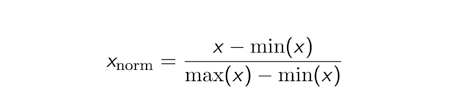

In [122]:
X_train.dtypes

INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
REG_FEE                    int64
COMMIS                     int64
AREA_Anna_Nagar             bool
AREA_Chrompet               bool
AREA_KK_Nagar               bool
AREA_Karapakkam             bool
AREA_T_Nagar                bool
AREA_Velachery              bool
SALE_COND_Adj_Land          bool
SALE_COND_Family            bool
SALE_COND_Normal_Sale       bool
SALE_COND_Partial           bool
PARK_FACIL_Yes              bool
BUILDTYPE_House             bool
BUILDTYPE_Others            bool
UTILITY_AVAIL_ELO           bool
UTILITY_AVAIL_NoSeWa        bool
UTILITY_AVAIL_NoSewr        bool
STREET_NoAccess             bool
STREET_Paved                bool
MZZONE_C                    bool
MZZONE_I  

In [123]:
X_train.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,AREA_Anna_Nagar,...,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_NoAccess,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
16,1208,80,2.0,2.0,4,4.7,2.8,4.6,4.27,317856,10253,False,...,False,True,False,False,False,False,True,False,False,False,True,False
816,1737,174,1.0,1.0,4,3.1,2.1,4.0,3.21,319831,115139,True,...,False,True,False,False,True,False,True,False,False,True,False,False
4064,983,132,1.0,1.0,3,3.7,2.2,4.5,3.34,257040,140957,False,...,True,False,False,True,False,True,False,False,False,False,False,True
3936,964,170,1.0,1.0,3,3.3,4.0,4.7,4.07,361384,132214,False,...,False,False,True,False,False,False,True,False,False,False,True,False
767,1337,123,2.0,2.0,4,3.1,4.3,2.1,3.06,255448,117368,False,...,True,False,False,False,True,True,False,False,False,False,True,False


In [124]:
for coluna in X_train.columns:
    if X_train[coluna].dtype == bool:
        X_train[coluna] = X_train[coluna].replace({True: 1, False: 0})

In [125]:
for coluna in X_test.columns:
    if X_test[coluna].dtype == bool:
        X_test[coluna] = X_test[coluna].replace({True: 1, False: 0})

In [126]:
categorical_columns = X_train.select_dtypes(
    include=['object']).columns.tolist()

categorical_columns


[]

In [127]:
for col in list(X_train.columns):
  maximo = X_train[col].max()
  minimo = X_train[col].min()

  X_train[col] = (X_train[col] - minimo) / (maximo - minimo)

  #Novamente, uso os dados de X_train para replicar no treino e validação
  X_test[col] = (X_test[col] - minimo) / (maximo - minimo)

In [128]:
#Todos os dados estao entre 0 e 1
X_train.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,AREA_Anna_Nagar,...,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_NoAccess,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000
mean,0.441767,0.496365,0.211500,0.212500,0.422250,0.505092,0.501917,0.496358,0.496186,0.336402,0.277372,0.113250,...,0.344250,0.324250,0.213000,0.266000,0.250750,0.284000,0.363750,0.079250,0.07425,0.257000,0.261750,0.250500
std,0.228866,0.286653,0.267929,0.409128,0.255384,0.296142,0.299084,0.293567,0.181003,0.158779,0.162720,0.316938,...,0.475182,0.468152,0.409479,0.441919,0.433499,0.450993,0.481138,0.270162,0.26221,0.437034,0.439642,0.433355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.247499,0.250000,0.000000,0.000000,0.250000,0.233333,0.233333,0.233333,0.365550,0.219634,0.157898,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.438719,0.495000,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000,0.498282,0.306297,0.250392,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.623437,0.740000,0.333333,0.000000,0.500000,0.766667,0.766667,0.733333,0.628866,0.420702,0.368586,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [129]:
max_y = y_train.max()

In [130]:
min_y = y_train.min()

In [131]:
X_train

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,AREA_Anna_Nagar,...,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_NoAccess,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
16,0.354177,0.400,0.333333,1.0,0.50,0.900000,0.266667,0.866667,0.759450,0.270261,0.010601,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
816,0.618809,0.870,0.000000,0.0,0.50,0.366667,0.033333,0.666667,0.395189,0.272424,0.224501,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4064,0.241621,0.660,0.000000,0.0,0.25,0.566667,0.066667,0.833333,0.439863,0.203631,0.277153,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3936,0.232116,0.850,0.000000,0.0,0.25,0.433333,0.666667,0.900000,0.690722,0.317950,0.259323,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
767,0.418709,0.615,0.333333,1.0,0.50,0.366667,0.766667,0.033333,0.343643,0.201887,0.229047,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0.743372,0.995,0.333333,0.0,0.75,0.600000,0.366667,0.866667,0.647766,0.487985,0.421895,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4148,0.251626,0.520,0.000000,0.0,0.25,0.200000,0.966667,0.600000,0.587629,0.342789,0.193331,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
884,0.507754,0.820,0.000000,0.0,0.50,0.133333,0.500000,0.933333,0.582474,0.475387,0.453213,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2743,0.807404,0.230,0.666667,1.0,0.75,0.233333,0.333333,0.633333,0.415808,0.614802,0.562827,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [132]:
# y_train = (y_train - min_y) / (max_y-min_y)
# y_test = (y_test - min_y) / (max_y-min_y)

In [133]:
len(X_train.columns)

34

In [134]:
for coluna in X_train.columns:

    print(f"{coluna} -- {X_train[coluna].dtype}")

INT_SQFT -- float64
DIST_MAINROAD -- float64
N_BEDROOM -- float64
N_BATHROOM -- float64
N_ROOM -- float64
QS_ROOMS -- float64
QS_BATHROOM -- float64
QS_BEDROOM -- float64
QS_OVERALL -- float64
REG_FEE -- float64
COMMIS -- float64
AREA_Anna_Nagar -- float64
AREA_Chrompet -- float64
AREA_KK_Nagar -- float64
AREA_Karapakkam -- float64
AREA_T_Nagar -- float64
AREA_Velachery -- float64
SALE_COND_Adj_Land -- float64
SALE_COND_Family -- float64
SALE_COND_Normal_Sale -- float64
SALE_COND_Partial -- float64
PARK_FACIL_Yes -- float64
BUILDTYPE_House -- float64
BUILDTYPE_Others -- float64
UTILITY_AVAIL_ELO -- float64
UTILITY_AVAIL_NoSeWa -- float64
UTILITY_AVAIL_NoSewr  -- float64
STREET_NoAccess -- float64
STREET_Paved -- float64
MZZONE_C -- float64
MZZONE_I -- float64
MZZONE_RH -- float64
MZZONE_RL -- float64
MZZONE_RM -- float64


## Modelagem

### Parametros da Rede Neural

* Early Stopping

In [135]:
# Incluindo early stopping

# Defina o callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Métrica a ser monitorada
    patience=50,          # Número de épocas sem melhoria antes de parar o treinamento
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

* Learning Rate

In [136]:
# Definindo a função para agendar o learning rate
def lr_scheduler(epoch):
    if epoch < 50:
        return 0.005
    elif epoch < 100:
        return 0.001
    elif epoch < 150:
        return 0.0005
    else:
        return 0.0001

# Criando o callback para o Learning Rate Scheduler
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Optei por alterar o learning rate a cada 50 epocas,
# pois o early stop vai encerrar o treinamento quando 50 epocas se passarem sem melhorar o modelo.

Lembrete: esses parâmetros (early stopping e learning rate) são utilizados como callbacks:



```
# Treinando o modelo
model.fit(X_train, y_train, epochs=200, batch_size=16, callbacks=[lr_scheduler_callback,early_stopping_callback])
```



* Treinamento com Treino e Teste



```
# Treinando o modelo com os dados de treinamento e calculando a perda no conjunto de teste
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))

```



### Modelo 1

In [137]:
# Crie o modelo sequencial
model = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model.add(tf.keras.layers.Dense(1, activation='relu')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model.compile(optimizer='adam', loss=tf.keras.losses.Huber(delta=1.0))

In [138]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               4480      
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dense_22 (Dense)            (None, 512)               131584    
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 64)               

In [139]:
type(X_train.values)

numpy.ndarray

In [140]:
X_train_dropped = X_train.drop(X_train.columns[:30], axis=1)

X_test_dropped = X_test.drop(X_test.columns[:10], axis=1)


In [141]:
X_test = X_test.drop(columns=['PRT_ID'])

In [142]:
X_train.shape[1]

34

In [143]:
X_test.shape[1]

34

In [144]:
history = model.fit(X_train.values, np.array(y_train), epochs=1000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(np.asarray(X_test.values).astype('float32'), np.array(y_test))
                    )

Epoch 1/1000
2/2 [==============================] - 1s 83ms/step - loss: 10948473.0000 - val_loss: 10734281.0000 - lr: 0.0050
Epoch 2/1000
2/2 [==============================] - 0s 21ms/step - loss: 10948389.0000 - val_loss: 10733649.0000 - lr: 0.0050
Epoch 3/1000
2/2 [==============================] - 0s 19ms/step - loss: 10947256.0000 - val_loss: 10728295.0000 - lr: 0.0050
Epoch 4/1000
2/2 [==============================] - 0s 19ms/step - loss: 10939019.0000 - val_loss: 10698815.0000 - lr: 0.0050
Epoch 5/1000
2/2 [==============================] - 0s 19ms/step - loss: 10897420.0000 - val_loss: 10575126.0000 - lr: 0.0050
Epoch 6/1000
2/2 [==============================] - 0s 19ms/step - loss: 10732108.0000 - val_loss: 10144639.0000 - lr: 0.0050
Epoch 7/1000
2/2 [==============================] - 0s 19ms/step - loss: 10178403.0000 - val_loss: 8829860.0000 - lr: 0.0050
Epoch 8/1000
2/2 [==============================] - 0s 20ms/step - loss: 8534217.0000 - val_loss: 5250175.5000 - lr: 0.

In [145]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss = history.history['loss']
test_loss = history.history['val_loss']

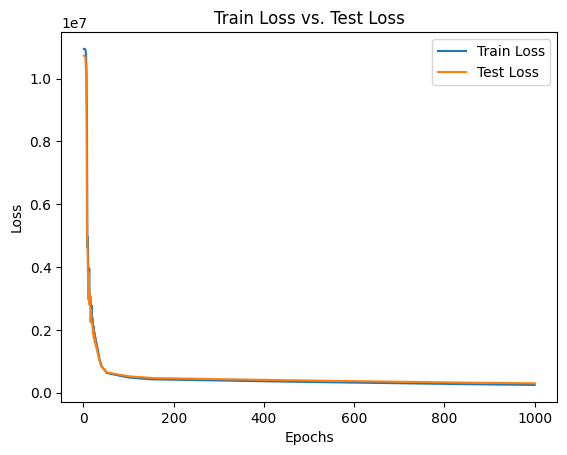

In [146]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

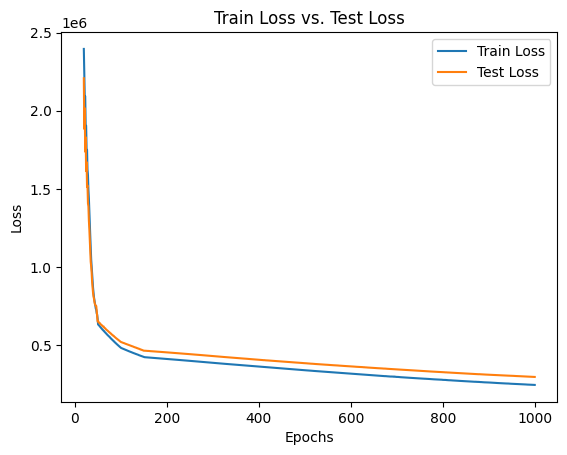

In [147]:
# Plotando o gráfico comparativo a partir da epoch 25
epochs = range(20, len(train_loss) + 1)
plt.plot(epochs, train_loss[19:], label='Train Loss')
plt.plot(epochs, test_loss[19:], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Modelo 2

In [149]:
# Crie o model2o sequencial
model2 = tf.keras.models.Sequential() #Definimos que é um model2o de rede neural sequencial

# Adicione a primeira camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model2.add(tf.keras.layers.Dense(1, activation='relu')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o model2o
model2.compile(optimizer='adam', loss='mean_squared_error')


In [150]:
history2 = model2.fit(X_train.values, np.array(y_train), epochs=1000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test)))

Epoch 1/1000


2/2 [==============================] - 1s 73ms/step - loss: 134591507595264.0000 - val_loss: 128470239674368.0000 - lr: 0.0050
Epoch 2/1000
2/2 [==============================] - 0s 21ms/step - loss: 134590173806592.0000 - val_loss: 128460601163776.0000 - lr: 0.0050
Epoch 3/1000
2/2 [==============================] - 0s 19ms/step - loss: 134572968771584.0000 - val_loss: 128382863933440.0000 - lr: 0.0050
Epoch 4/1000
2/2 [==============================] - 0s 20ms/step - loss: 134452961345536.0000 - val_loss: 127968433143808.0000 - lr: 0.0050
Epoch 5/1000
2/2 [==============================] - 0s 20ms/step - loss: 133862126518272.0000 - val_loss: 126275888873472.0000 - lr: 0.0050
Epoch 6/1000
2/2 [==============================] - 0s 20ms/step - loss: 131574368567296.0000 - val_loss: 120537393135616.0000 - lr: 0.0050
Epoch 7/1000
2/2 [==============================] - 0s 21ms/step - loss: 124156507062272.0000 - val_loss: 103971922378752.0000 - lr: 0.0050
Epoch 8/1000
2/2 [===============

In [151]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']

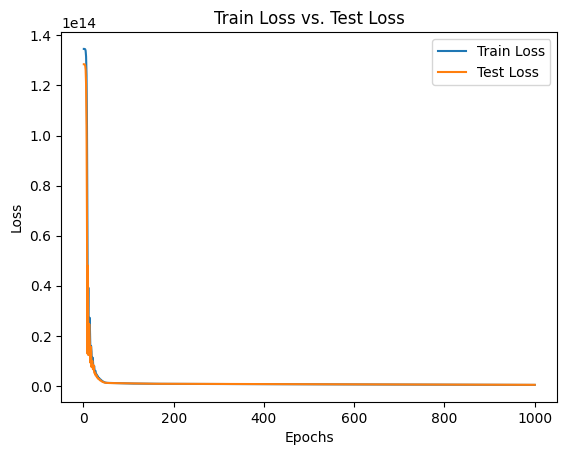

In [152]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss2) + 1)
plt.plot(epochs, train_loss2, label='Train Loss')
plt.plot(epochs, test_loss2, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

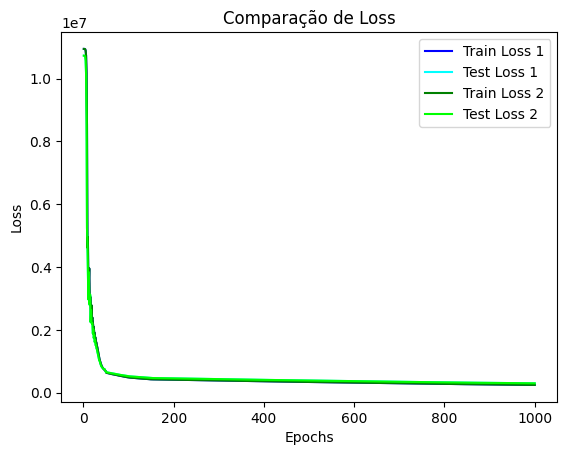

In [153]:
# Interpolação para ajustar as curvas de perda com a mesma quantidade de pontos
epochs1 = range(1, len(train_loss) + 1)
epochs2 = np.linspace(1, len(train_loss), len(train_loss2))
train_loss2_interp = np.interp(epochs2, epochs1, train_loss)
test_loss2_interp = np.interp(epochs2, epochs1, test_loss)

# Plotando o gráfico comparativo
plt.plot(epochs1, train_loss, label='Train Loss 1', color='blue')
plt.plot(epochs1, test_loss, label='Test Loss 1', color='cyan')
plt.plot(epochs2, train_loss2_interp, label='Train Loss 2', color='green')
plt.plot(epochs2, test_loss2_interp, label='Test Loss 2', color='lime')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparação de Loss')
plt.legend()
plt.show()

Neste exemplo, comparamos a mesma arquitetura de rede neural, alterando apenas a função de perda.

No modelo 1, a função de perda era Huber Loss. No modelo 2, RMSE.

Vale ressaltar, que os resultados dos modelos dependem da inicialização. Portanto, isso pode variar, dependendo da execução.

**Percebemos que, o modelo 1 apresentou um erro melhor.**

### Modelo 3 - Criado a partir de experimentação

In [154]:
# Crie o model3o sequencial
model3 = tf.keras.models.Sequential() #Definimos que é um model3o de rede neural sequencial

# Adicione a primeira camada oculta
model3.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(32, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model3.add(tf.keras.layers.Dense(1, activation='relu')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo3
model3.compile(optimizer='adam', loss='mean_squared_error')


In [155]:
history3 = model3.fit(X_train.values, np.array(y_train), epochs=1000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test)))

Epoch 1/1000
2/2 [==============================] - 0s 54ms/step - loss: 134591524372480.0000 - val_loss: 128470734602240.0000 - lr: 0.0050
Epoch 2/1000
2/2 [==============================] - 0s 11ms/step - loss: 134591474040832.0000 - val_loss: 128470675881984.0000 - lr: 0.0050
Epoch 3/1000
2/2 [==============================] - 0s 11ms/step - loss: 134591415320576.0000 - val_loss: 128470583607296.0000 - lr: 0.0050
Epoch 4/1000
2/2 [==============================] - 0s 14ms/step - loss: 134591306268672.0000 - val_loss: 128470424223744.0000 - lr: 0.0050
Epoch 5/1000
2/2 [==============================] - 0s 13ms/step - loss: 134591113330688.0000 - val_loss: 128470147399680.0000 - lr: 0.0050
Epoch 6/1000
2/2 [==============================] - 0s 12ms/step - loss: 134590819729408.0000 - val_loss: 128469753135104.0000 - lr: 0.0050
Epoch 7/1000
2/2 [==============================] - 0s 11ms/step - loss: 134590391910400.0000 - val_loss: 128469157543936.0000 - lr: 0.0050
Epoch 8/1000
2/2 [==

In [156]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss3 = history3.history['loss']
test_loss3 = history3.history['val_loss']

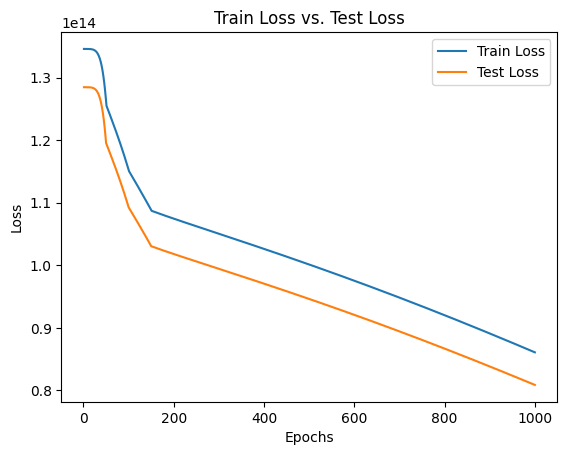

In [157]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss3) + 1)
plt.plot(epochs, train_loss3, label='Train Loss')
plt.plot(epochs, test_loss3, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

In [70]:
# # Interpolação para ajustar as curvas de perda com a mesma quantidade de pontos
# epochs1 = range(1, len(train_loss) + 1)
# epochs2 = np.linspace(1, len(train_loss), len(train_loss2))
# epochs3 = np.linspace(1, len(train_loss2), len(train_loss3))

# train_loss2_interp = np.interp(epochs2, epochs1, train_loss)
# test_loss2_interp = np.interp(epochs2, epochs1, test_loss)

# train_loss3_interp = np.interp(epochs3, epochs2, train_loss3)
# test_loss3_interp = np.interp(epochs3, epochs2, test_loss3)

# # Plotando o gráfico comparativo
# plt.plot(epochs1, train_loss, label='Train Loss 1', color='blue')
# plt.plot(epochs1, test_loss, label='Test Loss 1', color='cyan')
# plt.plot(epochs2, train_loss2_interp, label='Train Loss 2', color='green')
# plt.plot(epochs2, test_loss2_interp, label='Test Loss 2', color='lime')
# plt.plot(epochs3, train_loss3_interp, label='Train Loss 3', color='green')
# plt.plot(epochs3, test_loss3_interp, label='Test Loss 3', color='lime')
# plt.plot()
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Comparação de Loss')
# plt.legend()
# plt.show()

Neste exemplo, comparamos a mesma arquitetura de rede neural, alterando apenas a função de perda.

No modelo 1, a função de perda era Huber Loss. No modelo 2, RMSE.

Vale ressaltar, que os resultados dos modelos dependem da inicialização. Portanto, isso pode variar, dependendo da execução.

**Percebemos que, o modelo 1 apresentou um erro melhor.**

### Teste Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
# Criar e treinar o modelo de Random Forest
model_rf = RandomForestRegressor(min_samples_leaf=int(len(X_train)*0.05),random_state=2023,n_estimators=250)
# n_estimators = Qt de arvores;
# min_samples_leaf = qt de dados necessario em cada folha
# random_state = semente

In [160]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=200, n_estimators=250, random_state=2023)

### Comparando os modelos

In [166]:
df_validacao.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'],
      dtype='object')

In [167]:
X_val = df_validacao_encoded.drop(columns=['PRT_ID'])

In [170]:
for coluna in X_val.columns:
    if X_val[coluna].dtype == bool:
        X_val[coluna] = X_val[coluna].replace({True: 1, False: 0})

In [171]:
X_val.dtypes

INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
AREA_Anna_Nagar            int64
AREA_Chrompet              int64
AREA_KK_Nagar              int64
AREA_Karapakkam            int64
AREA_T_Nagar               int64
AREA_Velachery             int64
SALE_COND_Adj_Land         int64
SALE_COND_Family           int64
SALE_COND_Normal_Sale      int64
SALE_COND_PartiaLl         int64
SALE_COND_Partial          int64
SALE_COND_Partiall         int64
PARK_FACIL_Yes             int64
BUILDTYPE_House            int64
BUILDTYPE_Others           int64
UTILITY_AVAIL_ELO          int64
UTILITY_AVAIL_NoSeWa       int64
UTILITY_AVAIL_NoSewr       int64
STREET_NoAccess            int64
STREET_Paved               int64
MZZONE_C                   int64
MZZONE_I  

In [172]:
# Avaliar o modelo 1 (funcao de perda Huber) no conjunto de validação
val_predictions1 = model.predict(X_val)

66/66 [==============================] - 0s 616us/step


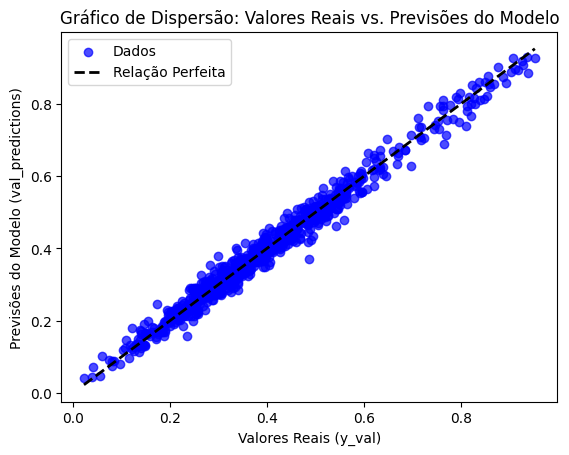

In [75]:
# Criar o gráfico de dispersão
plt.scatter(y_val, val_predictions1, alpha=0.7, c='b', label='Dados')

# Adicionar linha de referência (y = x) para mostrar a relação perfeita entre previsões e rótulos
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--', lw=2, label='Relação Perfeita')

# Definir os rótulos dos eixos
plt.xlabel('Valores Reais (y_val)')
plt.ylabel('Previsões do Modelo (val_predictions)')

# Adicionar título ao gráfico
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões do Modelo')

# Adicionar legenda ao gráfico
plt.legend()

# Mostrar o gráfico
plt.show()

In [76]:
# Avaliar o modelo 2 (funcao de perda RMSE) no conjunto de validação
val_predictions2 = model2.predict(X_val)

25/25 [==============================] - 0s 1ms/step


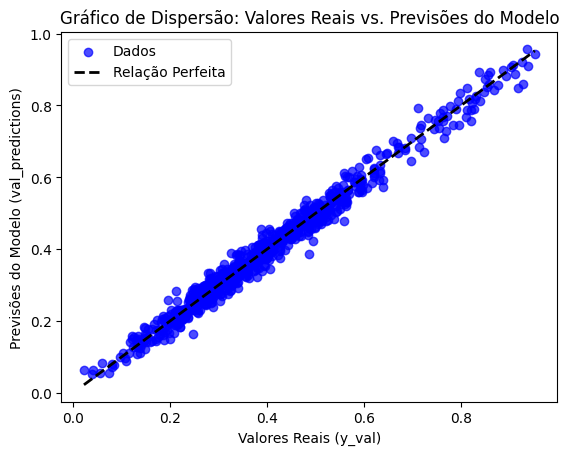

In [77]:
# Criar o gráfico de dispersão
plt.scatter(y_val, val_predictions2, alpha=0.7, c='b', label='Dados')

# Adicionar linha de referência (y = x) para mostrar a relação perfeita entre previsões e rótulos
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--', lw=2, label='Relação Perfeita')

# Definir os rótulos dos eixos
plt.xlabel('Valores Reais (y_val)')
plt.ylabel('Previsões do Modelo (val_predictions)')

# Adicionar título ao gráfico
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões do Modelo')

# Adicionar legenda ao gráfico
plt.legend()

# Mostrar o gráfico
plt.show()

In [78]:
# Avaliar o modelo 2 (funcao de perda RMSE) no conjunto de validação
val_predictions3 = model3.predict(X_val)


25/25 [==============================] - 0s 465us/step


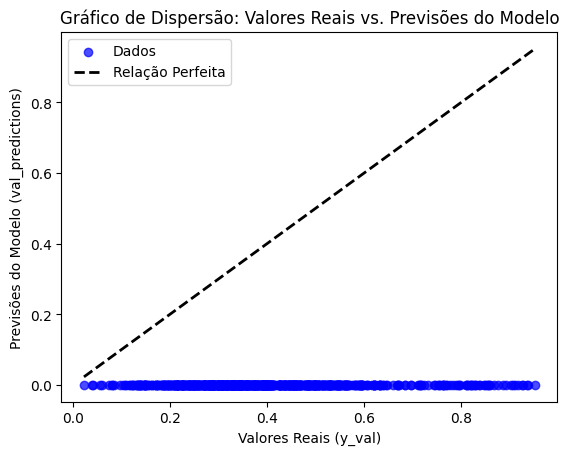

In [79]:
# Criar o gráfico de dispersão
plt.scatter(y_val, val_predictions3, alpha=0.7, c='b', label='Dados')

# Adicionar linha de referência (y = x) para mostrar a relação perfeita entre previsões e rótulos
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)],
         'k--', lw=2, label='Relação Perfeita')

# Definir os rótulos dos eixos
plt.xlabel('Valores Reais (y_val)')
plt.ylabel('Previsões do Modelo (val_predictions)')

# Adicionar título ao gráfico
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões do Modelo')

# Adicionar legenda ao gráfico
plt.legend()

# Mostrar o gráfico
plt.show()


In [80]:
# Avaliar o modelo de Random Forest no conjunto de validação
val_predictionsrf = model_rf.predict(X_val)

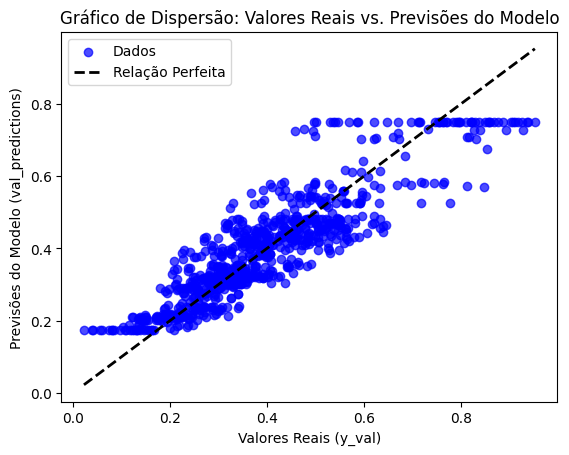

In [81]:
# Criar o gráfico de dispersão
plt.scatter(y_val, val_predictionsrf, alpha=0.7, c='b', label='Dados')

# Adicionar linha de referência (y = x) para mostrar a relação perfeita entre previsões e rótulos
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--', lw=2, label='Relação Perfeita')

# Definir os rótulos dos eixos
plt.xlabel('Valores Reais (y_val)')
plt.ylabel('Previsões do Modelo (val_predictions)')

# Adicionar título ao gráfico
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões do Modelo')

# Adicionar legenda ao gráfico
plt.legend()

# Mostrar o gráfico
plt.show()

In [82]:
from sklearn.metrics import mean_squared_error

print(f'Modelo Redes Neurais RMSE: {mean_squared_error(y_val, val_predictions1, squared=False):.4f}')
print(f'Modelo Redes Neurais Huber: {mean_squared_error(y_val, val_predictions2, squared=False):.4f}')
print(f'Modelo RF: {mean_squared_error(y_val, val_predictionsrf, squared=False):.4f}')

Modelo Redes Neurais RMSE: 0.0240
Modelo Redes Neurais Huber: 0.0236
Modelo RF: 0.0781


* Nesse teste, a rede neural com a função de perda Huber Loss obteve um erro menor que os demais modelos.

* O modelo Random Forest teve um erro menor que a Rede Neural com a função de erro RMSE.

O ranking dos modelo ficou, como:
1. Rede Neural Huber Loss: RMSE 0.0690;
2. Random Forest: RMSE 0.0806
3. Rede Neural RMSE: RMSE 0.0891.

# Atividade

A base '05_df_treino_teste.csv' envolve características de imóveis e o preço de venda desses respectivos imóveis. Nessa base contém um conjunto variáveis explicativas. **Algumas dessas variáveis** são geradas após a venda do imóvel. Por esse motivo, na base '05_validacao.csv', constam menos colunas.

Da atividade:
1. Tratamento de dados: tratamento de missing, conversão de variável categórica para numérica e criação de novas variáveis;
2. Teste diferentes arquiteturas de redes neurais, utilizando a base '05_df_treino_teste.csv'. Não esqueça de dividir entre treino e teste.
3. Faça a predição na base '05_validacao.csv'. Cada grupo poderá enviar até 3 colunas de predição. É obrigatório enviar a coluna PRT_ID e as três colunas de predição.

Lembrem-se que a coluna **PRT_ID** não é uma variável explicativa.

In [83]:
len(X_val)

800

In [129]:
# # Separando o Atributo de Identificação do Banco de Dados.
# ID = X_val['PRT_ID']

# # Removendo o Atributo ID Do Banco de Dados.
# X_val = X_val.drop(columns=['PRT_ID'])

#Criando o DataFrame que Irá Armazenar os Resultados
result = pd.DataFrame(index=ID)

In [130]:
y_pred = model.predict(np.array(X_val)).flatten()

result['Model_1'] = y_pred


25/25 [==============================] - 0s 1ms/step


In [131]:
y_pred = model2.predict(np.array(X_val)).flatten()

result['Model_2'] = y_pred

25/25 [==============================] - 0s 1ms/step


In [132]:
y_pred = model3.predict(np.array(X_val)).flatten()

result['Model_3'] = y_pred

25/25 [==============================] - 0s 367us/step


In [133]:
result_export = result[['Model_1', 'Model_2', 'Model_3']]

result_export.to_csv('./resultados/base_ac2.csv')